In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Reading the dataset
data = pd.read_csv("C:/Users/Vusal/house.csv")
print (data.head())
print (data['nbhd'].unique())
print (data['brick'].unique())
print (data.dtypes)

   home    nbhd  offers  sqft brick  bedrooms  bathrooms   price
0     1  nbhd02       2  1790    No         2          2  114300
1     2  nbhd02       3  2030    No         4          2  114200
2     3  nbhd02       1  1740    No         3          2  114800
3     4  nbhd02       3  1980    No         3          2   94700
4     5  nbhd02       3  2130    No         3          3  119800
['nbhd02' 'nbhd01' 'nbhd03']
['No' 'Yes']
home          int64
nbhd         object
offers        int64
sqft          int64
brick        object
bedrooms      int64
bathrooms     int64
price         int64
dtype: object


C:\Users\Vusal\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


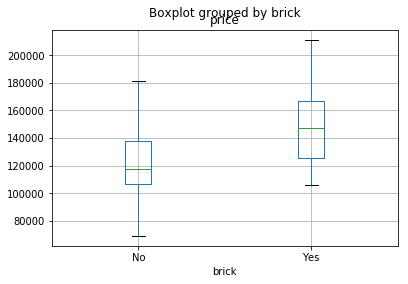

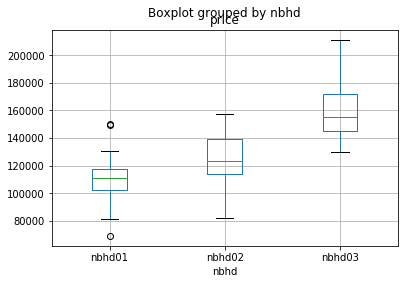

In [18]:
#boxplot shows that 'price' is dependent on 'brick' and 'nbhd' type
data.boxplot(column='price' ,by='brick')
plt.show()
data.boxplot(column='price' ,by='nbhd')
plt.show()

# Boxplots of the featues show that the price is dependent on chategorical varible nbhd and brick on other 
# numerical variables. So only column home is dropped from the feature set 
# since it is just house number. Rest all the columns are considered for the analysis

In [23]:
# Separating the data into Feature Space (X_data)
X_data = data[['nbhd','offers','sqft', 'brick','bedrooms','bathrooms']]
X_data = pd.get_dummies(X_data) # Convert categorical variable into dummy/indicator variables like 0 and 1
print (X_data.head())

# Dependent variable (Y_data)
Y_data = data[['price']]
print (Y_data.head())

# dropping derived column 'brick_Yes','nbhd_nbhd03'
X_data.drop(['brick_Yes','nbhd_nbhd03'], axis=1, inplace=True)

   offers  sqft  bedrooms  bathrooms  nbhd_nbhd01  nbhd_nbhd02  nbhd_nbhd03  \
0       2  1790         2          2            0            1            0   
1       3  2030         4          2            0            1            0   
2       1  1740         3          2            0            1            0   
3       3  1980         3          2            0            1            0   
4       3  2130         3          3            0            1            0   

   brick_No  brick_Yes  
0         1          0  
1         1          0  
2         1          0  
3         1          0  
4         1          0  
    price
0  114300
1  114200
2  114800
3   94700
4  119800


In [32]:
    # Dividing the datasets into Test and Train datasets (in the ratio of 80:20)
    X_train = X_data.sample(frac=0.8, random_state=100)
    X_test = X_data.drop(X_train.index)
    Y_train = Y_data.iloc[X_train.index] # .iloc[] is primarily integer position based (from 0 to length-1 of the axis)
    Y_test = Y_data.iloc[X_test.index]
    print (X_train.head(),'\n')
    print (Y_train.head(),'\n')
    print (X_test.head(),'\n')
    print (Y_test.head())

     offers  sqft  bedrooms  bathrooms  nbhd_nbhd01  nbhd_nbhd02  brick_No
11        2  1870         2          2            0            1         0
106       4  2130         3          2            1            0         1
105       4  2530         4          3            0            0         1
73        2  2040         3          3            0            1         1
92        2  2110         3          2            0            0         1 

      price
11   123000
106  108500
105  146900
73   125700
92   142600 

    offers  sqft  bedrooms  bathrooms  nbhd_nbhd01  nbhd_nbhd02  brick_No
8        3  2110         4          2            0            1         1
9        3  1730         3          3            0            1         1
10       3  2030         3          2            0            1         0
14       4  2590         4          3            0            0         1
15       1  1780         4          2            0            0         1 

     price
8   119200
9   10

[[      795    534150       799       651       110        92       183]
 [   534150 407980300    611060    497210     70050     72370    132570]
 [      799    611060       955       752        97       103       198]
 [      651    497210       752       625        83        87       158]
 [      110     70050        97        83        37         0        30]
 [       92     72370       103        87         0        36        21]
 [      183    132570       198       158        30        21        67]] 

[[   33011100]
 [26233790000]
 [   39784400]
 [   32274500]
 [    4030900]
 [    4417300]
 [    7943800]] 

[-10177.658222010516, 71.48463611472727, 5121.39191876248, 7921.026535997922, -13701.312562504541, -18980.600805965936, -16810.933640353585] 

[ 120835.69383677   96471.16673041  126806.46466918  171872.28829179
  136581.6811689   135987.37476153  162893.7758466   108008.88827009
  111477.56552634  116474.95200128  120278.74380032  143670.39395302
  169404.86295432  125885.42

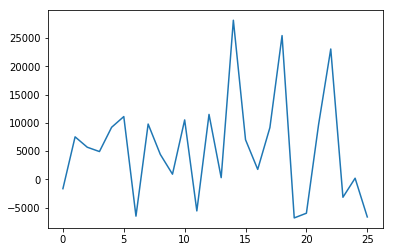

5545.737987803832 

10909.6033262


In [87]:
# GAUSSIAN ELIMINATION .. Writing a function myGauss for Gaussian Elimination algorithm
#In Gaussian elimination to perform row reduction on a matrix, one uses a sequence of elementary row operations to modify the matrix until the lower left-hand corner of the matrix is filled with zeros, as much as possible.
#There are three types of elementary row operations: 1) Swapping two rows, 2) Multiplying a row by a non-zero number, 3) Adding a multiple of one row to another row. 

def myGauss(m):
        #eliminate columns
        for col in range(len(m[0])):
            for row in range(col+1, len(m)):
                r = [(rowValue * (-(m[row][col] / m[col][col]))) for rowValue in m[col]]
                m[row] = [sum(pair) for pair in zip(m[row], r)]
        #now backsolve by substitution
        ans = []
        m.reverse() #makes it easier to backsolve
        for sol in range(len(m)):
                if sol == 0:
                    ans.append(m[sol][-1] / m[sol][-2])
                else:
                    inner = 0
                    #substitute in all known coefficients
                    for x in range(sol):
                        inner += (ans[x]*m[sol][-2-x])
                    #the equation is now reduced to ax + b = c form
                    #solve with (c - b) / a
                    ans.append((m[sol][-1]-inner)/m[sol][-sol-2])
        ans.reverse()
        return ans

# A_transpose*A Matrix for training feature sets
AtA = np.dot(X_train.as_matrix().transpose(),X_train.as_matrix())
print (AtA,'\n' )

# A_transpose*y matrix for predictor variable
AtY = np.dot(X_train.as_matrix().transpose(), Y_train.as_matrix())
print (AtY,'\n')

# Beta values (constants) corresponding to Gaussian ELimination algorithm
# np.hstack((AtA,AtY))
Betas_GE = myGauss(np.hstack((AtA,AtY)).tolist())
print (Betas_GE,'\n')

# Y prediction for test data
Y_testPredict_GE= np.dot(X_test.as_matrix(),Betas_GE)
print (Y_testPredict_GE,'\n')

# Error (y_test - y_hat)
Error_GE = Y_test['price']-Y_testPredict_GE
Error_GE.reset_index(drop=True,inplace=True)
print (Error_GE,'\n')

plt.plot(Error_GE)
plt.show()

#Average Residual for gaussian elimination\n",
print (np.mean(Error_GE),'\n')

# Root-mean-square error (RMSE) for gaussian elimination
print ((np.dot(Error_GE,Error_GE)/len(Error_GE))**0.5)

[[  2.81957444e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.89443482e+04   7.00656619e+03   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.83376097e+01   1.05932708e+01   6.30575044e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.30885907e+01   8.53652081e+00   1.15685706e+00   4.20790629e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.90129796e+00  -5.50561725e-01  -1.22447118e+00  -2.27916658e-01
    4.46379663e+00   0.00000000e+00   0.00000000e+00]
 [  3.26290375e+00   1.50664602e+00  -8.60040753e-01  -4.81046768e-02
   -2.90428041e+00   3.72916184e+00   0.00000000e+00]
 [  6.49034115e+00   1.37224379e+00  -7.25218671e-02  -8.27756188e-01
    1.15535950e+00   2.70423529e-01   4.57099491e+00]] 

[-10177.658222010441, 71.48463611472714, 5121.391918762493, 7921.02653599793, -13701.312562504627, -18980.600805965954, -16810.93

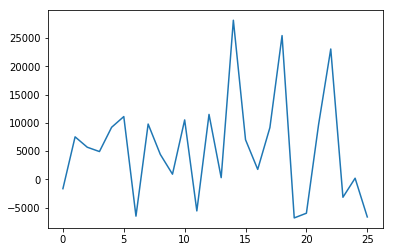

5545.737987803856 

606882471.2


In [81]:
# Cholesky Decomposition
#Defining forward substitution and backward substitution for lower and upper tringular matrix respectively
def ForwardSubstitution(m):
        #eliminate columns
        for col in range(len(m[0])):
            for row in range(col+1, len(m)):
                r = [(rowValue * (-(m[row][col] / m[col][col]))) for rowValue in m[col]]
                m[row] = [sum(pair) for pair in zip(m[row], r)]
        ans = []
        for sol in range(len(m)):
            ans.append([m[sol][-1] / m[sol][sol]])
        return ans
    
def BackwardSubstitution(m):
        #now backsolve by substitution
        ans = []
        m.reverse() #makes it easier to backsolve
        for sol in range(len(m)):
                if sol == 0:
                    ans.append(m[sol][-1] / m[sol][-2])
                else:
                    inner = 0
                    #substitute in all known coefficients
                    for x in range(sol):
                        inner += (ans[x]*m[sol][-2-x])
                    #the equation is now reduced to ax + b = c form
                    #solve with (c - b) / a
                    ans.append((m[sol][-1]-inner)/m[sol][-sol-2])
        ans.reverse()
        return ans
    
#Cholesky matrix decomposition
L = np.linalg.cholesky(AtA)
print (L,'\n')

#calculating Betas
Betas_interim = ForwardSubstitution(np.hstack((L,AtY)).tolist()) # np.hstack take a sequence of arrays and stack them horizontally to make a single array. Rebuild arrays divided by hsplit.
Betas_Cholesky = BackwardSubstitution(np.hstack((L.transpose(),Betas_interim)).tolist())
print(Betas_Cholesky,'\n')

Y_testPredict_Cholesky= np.dot(X_test.as_matrix(),Betas_Cholesky)
print (Y_testPredict_Cholesky,'\n')

Error_Cholesky = Y_test['price']-Y_testPredict_Cholesky
Error_Cholesky.reset_index(drop=True,inplace=True)
print (Error_Cholesky,'\n')

plt.plot(Error_Cholesky)
plt.show()

#Average Residual
print (np.mean(Error_Cholesky),'\n')

## Root-mean-square error (RMSE)
print (np.dot(Error_Cholesky,Error_Cholesky)/len(Error_Cholesky)**0.5)

[[ -1.48834141e-03   9.77199242e-01  -4.12685505e-02  -2.00090285e-02
    1.83932954e-01   8.66494280e-02  -4.04538766e-02]
 [ -9.99996936e-01  -1.50557858e-03   1.64725393e-03   8.68401244e-04
    4.60600660e-05   5.65272713e-04  -2.67379118e-04]
 [ -1.49582992e-03  -1.05544168e-02  -9.58189498e-01   1.80347544e-01
   -6.66569691e-02  -1.93857255e-01  -8.49130692e-02]
 [ -1.21875504e-03   2.59911463e-04  -1.75881326e-01  -9.64244387e-01
   -7.29552127e-02  -7.61515658e-02   1.67855425e-01]
 [ -2.05934032e-04   1.86801797e-01   1.78262342e-01   1.52136945e-02
   -7.87214552e-01  -4.80967657e-01  -2.86460276e-01]
 [ -1.72235736e-04  -2.80995484e-02   1.31935527e-01  -1.25914361e-02
    5.49617741e-01  -8.21557710e-01  -6.78831768e-02]
 [ -3.42599344e-04   9.63504779e-02   6.95649364e-03   1.92136433e-01
   -1.86055476e-01  -2.06941785e-01   9.36114375e-01]] [[ -5.34151637e+05  -4.07981437e+08  -6.11061768e+05  -4.97211418e+05
   -7.00502133e+04  -7.23701887e+04  -1.32570388e+05]
 [  0.0

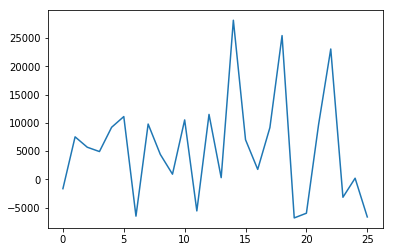

5545.7379878046195 

606882471.2


In [86]:
# QR Decomposition
# QR decomposition of a matrix is a decomposition of a matrix A into a product A = QR of an orthogonal matrix Q and an upper triangular matrix R. 
# QR decomposition is often used to solve the linear least squares problem, and is the basis for a particular eigenvalue algorithm, the QR algorithm.

q,r = np.linalg.qr(AtA)
print (q,r,'\n')

#QR Decomposition: for linear system of equation Ax=y
# QR Dec.=> A=QR => QRx = y => Rx =Q_tans*y
Betas_QR = BackwardSubstitution(np.hstack((r,np.dot(q.transpose(),AtY))).tolist())
print (Betas_QR,'\n')

Y_testPredict_QR= np.dot(X_test.as_matrix(),Betas_QR)
print (Y_testPredict_QR,'\n')

Error_QR = Y_test['price']- Y_testPredict_QR
Error_QR.reset_index(drop=True,inplace=True)
print (Error_QR,'\n')

plt.plot(Error_QR)
plt.show()

#Average Residual
print (np.mean(Error_QR),'\n')

# Root-mean-square error (RMSE)
print (np.dot(Error_QR,Error_QR)/len(Error_QR)**0.5)